In [261]:

%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
from pathlib import Path
import geopandas as gpd
import copy

import shelby_network_fns as fn

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [275]:
#read files
data_folder = Path('gis/shelbyCoUtilities')

power_links = pd.read_csv(data_folder/'power_links.csv')
power_nodes = pd.read_csv(data_folder/'power_nodes.csv')
water_links = pd.read_csv(data_folder/'water_links.csv')
water_nodes = pd.read_csv(data_folder/'water_nodes_fp.csv')

shelby_power_original = fn.ShelbyPowerNetwork()
shelby_power_original.load_network(power_nodes, power_links)
shelby_power_original.convert_latlon_to_coords()

In [276]:
shelby_power = copy.deepcopy(shelby_power_original)

for index, row in shelby_power._nodes.iterrows():
    if row['type'] == 'gate_stations':
        shelby_power._nodes.loc[index, 'flow'] = row['flow']
        
for index, row in shelby_power._nodes.iterrows():
    if row['type'] in ['12kv_substations', '23kv_substations']:
        shelby_power._nodes.loc[index, 'flow'] = row['flow']

pn = shelby_power.generate_empty_network()
shelby_power.construct_nodes(pn)
shelby_power.construct_links(pn)

shelby_power.run_diagnostic(pn)



_____________ PANDAPOWER DIAGNOSTIC TOOL _____________ 


 --------


 --------


 --------


 --------


 --------


 --------


 --------


 --------


 --------


 --------


 --------


 --------


 --------


 --------

_____________ END OF PANDAPOWER DIAGNOSTIC _____________ 


<Figure size 3600x3600 with 0 Axes>

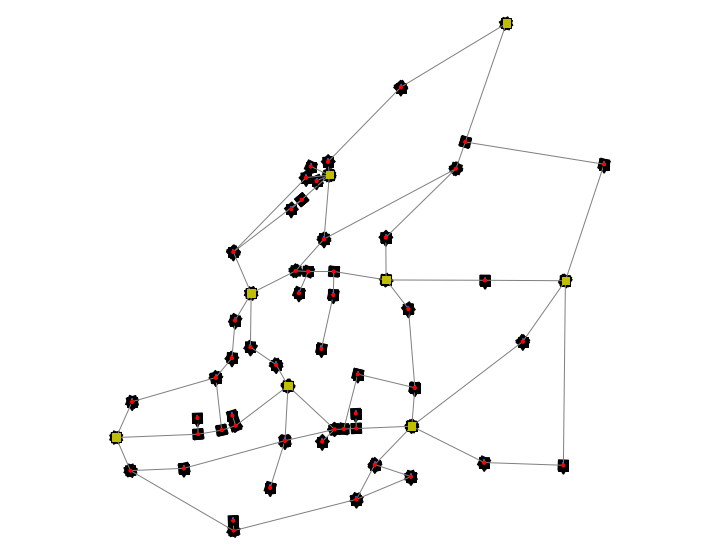

In [281]:
shelby_power.run_simulation(pn)
shelby_power.plot_pandaplot(pn)